In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math,copy

In [3]:
ds=pd.read_csv(r"C:\Users\vedan\Desktop\datasets\framingham.csv")

In [4]:
ds.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
ds

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
ds_filled = ds.fillna(ds.mean())

In [7]:
ds_filled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming ds_filled is your dataset
#ds_filled = pd.read_csv('path_to_your_dataset.csv')  # Load your dataset if not already loaded

# List of features to exclude from scaling
features_to_exclude = ['currentSmoker', 'BPMeds', 'prevalentStroke', 
                       'prevalentHyp', 'diabetes', 'male','TenYearCHD']

# Separate the features that need scaling from those that don't
features_to_scale = [col for col in ds_filled.columns if col not in features_to_exclude]

# Apply StandardScaler to the selected features
scaler = StandardScaler()
ds_filled_scaled = ds_filled.copy()
ds_filled_scaled[features_to_scale] = scaler.fit_transform(ds_filled[features_to_scale])

# ds_filled_scaled now contains scaled and unscaled features

In [9]:
ds_filled = ds_filled_scaled


In [10]:
x=ds_filled.drop('TenYearCHD',axis=1).values
y=ds_filled['TenYearCHD'].values

In [11]:
x

array([[ 1.        , -1.23495068,  2.00708772, ...,  0.28694273,
         0.34274444, -0.21751656],
       [ 0.        , -0.41825733,  0.02090466, ...,  0.71932499,
         1.59027451, -0.26131108],
       [ 1.        , -0.18491638, -0.97218687, ..., -0.11350221,
        -0.07309892, -0.52407818],
       ...,
       [ 0.        , -0.18491638,  0.02090466, ..., -0.93404582,
         0.67541912,  0.17663409],
       [ 0.        , -0.65159829, -0.97218687, ..., -1.63175357,
         0.84175647,  0.        ],
       [ 0.        ,  0.28176554,  0.02090466, ..., -1.06425185,
         0.34274444,  1.09631895]])

In [12]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


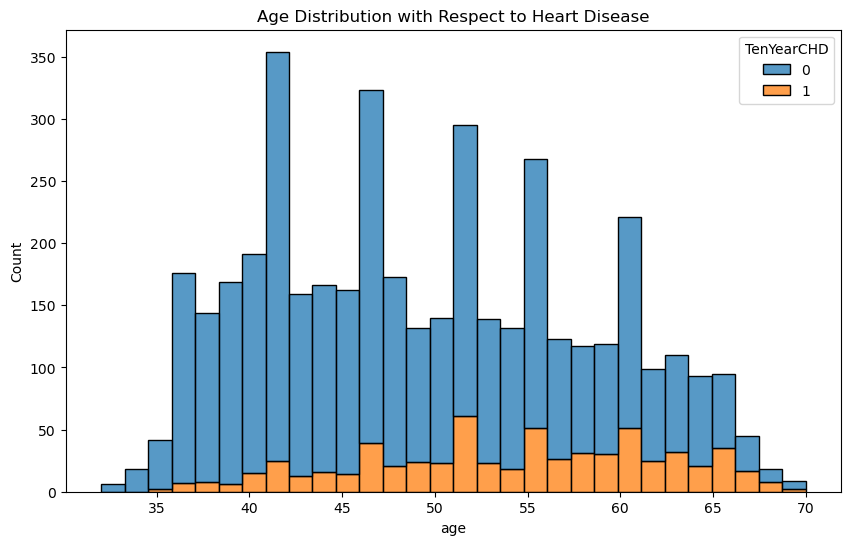

In [21]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='age', hue='TenYearCHD', multiple='stack', bins=30)
plt.title('Age Distribution with Respect to Heart Disease')
plt.show()


In [22]:
x_test

array([[ 1.        , -0.30158686,  2.00708772, ..., -1.636667  ,
        -0.65527962, -0.34890011],
       [ 1.        , -0.53492781,  2.00708772, ..., -0.45498593,
        -1.98597837,  0.04525054],
       [ 1.        ,  0.39843602,  0.02090466, ..., -0.44761578,
        -0.98795431, -0.17372204],
       ...,
       [ 1.        ,  0.86511793,  0.        , ..., -0.26090525,
        -1.15429165,  0.92114088],
       [ 1.        ,  1.44847032,  1.01399619, ...,  0.66282049,
        -0.65527962,  0.43940119],
       [ 1.        ,  0.98178841,  2.00708772, ...,  0.03881427,
         0.34274444,  0.04525054]])

In [23]:
x_train

array([[ 1.00000000e+00,  2.81765538e-01,  1.01399619e+00, ...,
         1.83760599e-01, -9.04785639e-01,  7.89757329e-01],
       [ 1.00000000e+00, -3.01586855e-01,  2.09046608e-02, ...,
        -8.30863691e-01,  2.00611787e+00,  3.51812161e-01],
       [ 0.00000000e+00, -1.23495068e+00, -9.72186868e-01, ...,
         6.87694539e-03, -3.22604937e-01, -4.36489143e-01],
       ...,
       [ 1.00000000e+00,  2.81765538e-01,  2.09046608e-02, ...,
        -1.13795337e+00, -1.56267594e-01,  1.45602550e-03],
       [ 0.00000000e+00, -4.18257334e-01, -9.72186868e-01, ...,
        -1.81846409e+00, -7.30989222e-02, -5.24078177e-01],
       [ 1.00000000e+00,  6.31776973e-01,  2.00708772e+00, ...,
        -1.24850565e+00, -3.22604937e-01, -4.80283660e-01]])

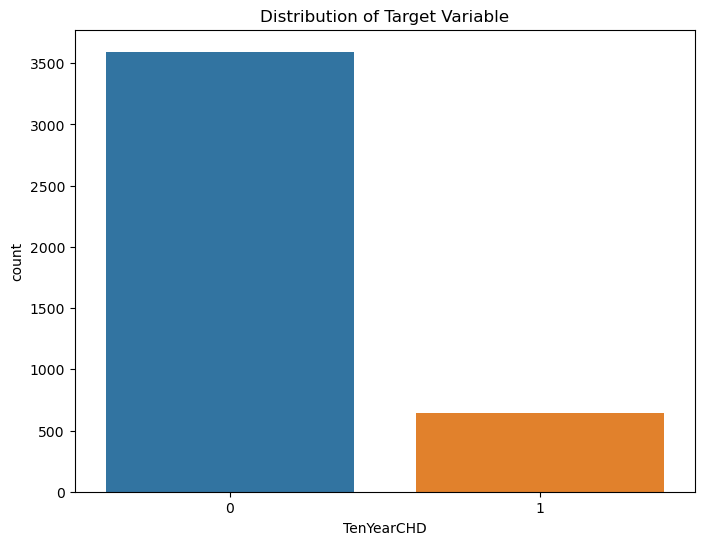

In [24]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=ds)
plt.title('Distribution of Target Variable')
plt.show()


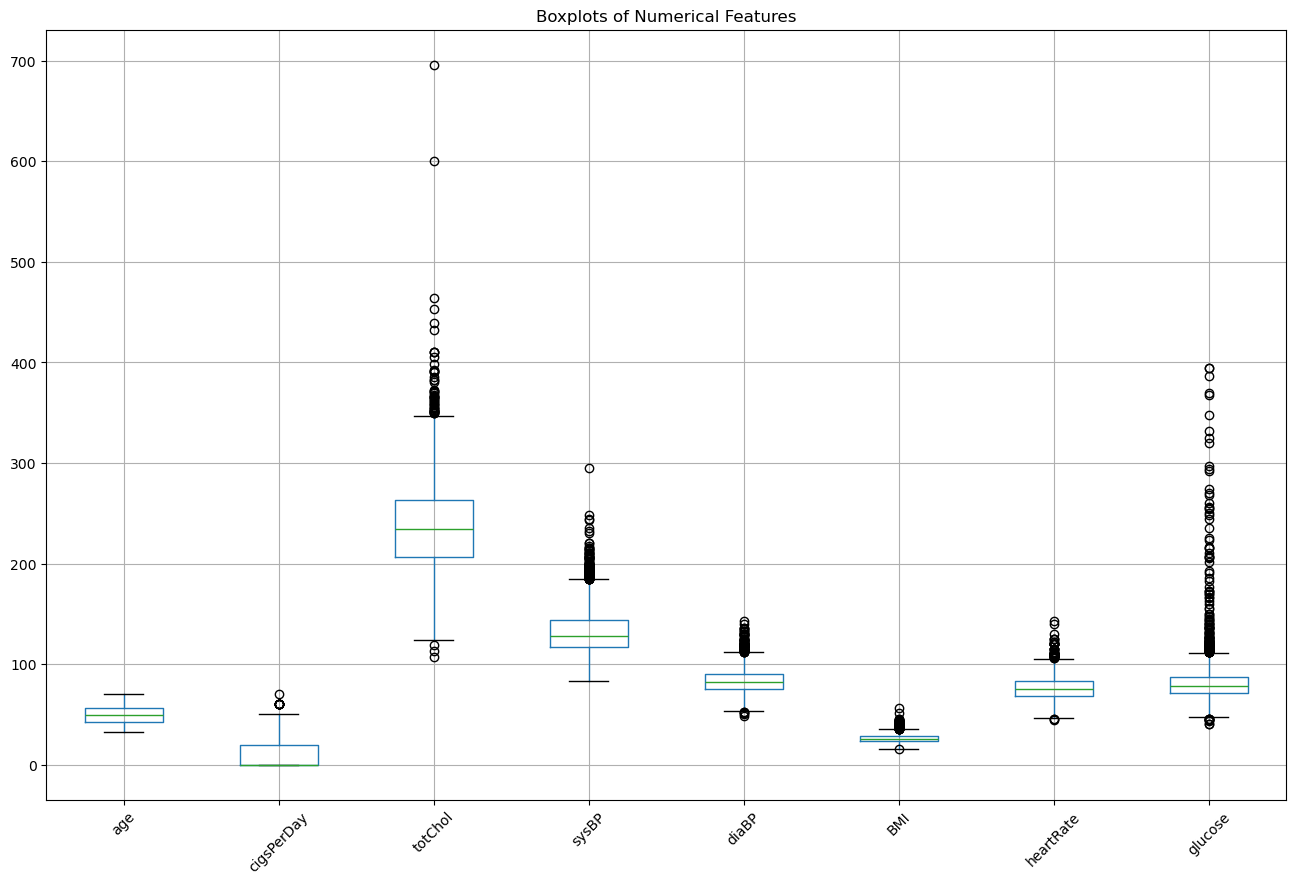

In [25]:
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
plt.figure(figsize=(16, 10))
ds[numerical_features].boxplot()
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


In [26]:
def sigmoid(z):
    f_wb=1/(1+np.exp(-z))
    return f_wb

In [27]:
def compute_cost(x_train,y_train,w,b):
    m,n=x_train.shape
    cost=0
    for i in range (m):
        cost =cost +((-1*y_train[i]*np.log(sigmoid(np.dot(x_train[i],w)+b)))-((1-y_train[i])*np.log(1-sigmoid(np.dot(x_train[i],w)+b))))
    return cost

In [28]:
def gradient(x_train,y_train,w,b):
    m,n=x_train.shape
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range (m):
        dj_db=dj_db+(sigmoid(np.dot(x_train[i],w)+b)-y_train[i])
        for j in range (n):
            dj_dw[j]=dj_dw[j]+((sigmoid(np.dot(x_train[i],w)+b)-y_train[i])*x_train[i,j])
    dj_db=dj_db/m
    dj_dw=dj_dw/m
    return dj_dw,dj_db

In [29]:
def gradient_descent(x_train,y_train,w,b,al,k):
    w_n=copy.deepcopy(w)
    b_n=b
    j_hist=np.empty(k)
    for i in range (k):
        dj_dw,dj_db=gradient(x_train,y_train,w_n,b_n)
        w_n=w_n-al*dj_dw
        b_n=b_n-al*dj_db
        j_hist[i]=compute_cost(x_train,y_train,w_n,b_n)
    return w_n,b_n,j_hist
    

In [30]:
m,n=x_train.shape
w_n=np.zeros(n)
b_n=0
al=5.0e-2
k=1000
w_o,b_o,j_hist=gradient_descent(x_train,y_train,w_n,b_n,al,k)

In [31]:
w_o

array([ 9.49058322e-02,  5.51572962e-01, -6.95210504e-02, -4.30562397e-01,
        4.88968136e-01, -3.20948765e-04,  5.65800373e-02, -1.37707610e-01,
       -1.20971388e-02,  2.79740553e-02,  3.26470763e-01,  3.36164688e-02,
        4.90634379e-02, -2.91068332e-02,  1.56290242e-01])

In [32]:
b_o

-1.684591820927795

In [33]:
j_hist

array([2317.41512853, 2286.35531557, 2256.53385271, 2227.8970251 ,
       2200.39308053, 2173.97223908, 2148.58668802, 2124.19056402,
       2100.73992483, 2078.19271216, 2056.50870749, 2035.64948226,
       2015.57834377, 1996.26027781, 1977.66188917, 1959.75134074,
       1942.49829194, 1925.87383711, 1909.8504443 , 1894.40189496,
       1879.50322472, 1865.13066567, 1851.26159021, 1837.87445671,
       1824.94875706, 1812.4649662 , 1800.40449357, 1788.74963671,
       1777.48353676, 1766.59013604, 1756.05413756, 1745.86096643,
       1735.99673319, 1726.44819893, 1717.20274214, 1708.24832725,
       1699.5734748 , 1691.16723315, 1683.01915163, 1675.1192552 ,
       1667.45802032, 1660.02635217, 1652.81556313, 1645.81735226,
       1639.02378607, 1632.42728015, 1626.02058186, 1619.79675397,
       1613.74915912, 1607.87144513, 1602.15753109, 1596.60159425,
       1591.19805746, 1585.94157747, 1580.82703367, 1575.84951754,
       1571.00432261, 1566.28693492, 1561.69302407, 1557.21843

In [34]:
iteration=np.arange(1,1001)

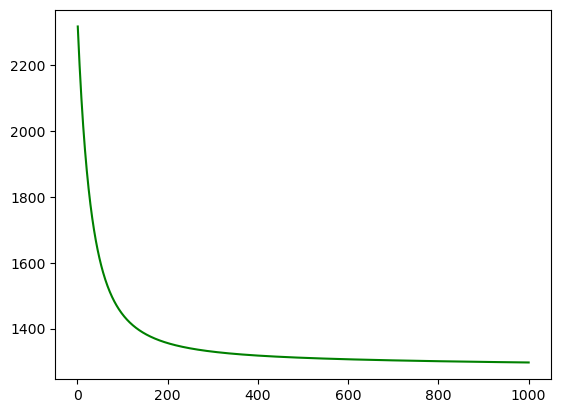

In [35]:
plt.plot(iteration,j_hist,color='green')

In [36]:
linear_output = np.dot(x_test, w_o) + b_o

# Apply the sigmoid function to get probabilities
y_pred_prob = sigmoid(linear_output)

# Convert probabilities to binary predictions (e.g., threshold at 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# y_pred contains the predicted class labels

In [37]:
y_pred_prob

array([0.24241534, 0.05711354, 0.12022917, 0.13713711, 0.04505858,
       0.04842603, 0.19008387, 0.07146767, 0.0319103 , 0.08711469,
       0.23682038, 0.34197576, 0.16955864, 0.0779986 , 0.14283594,
       0.35605925, 0.07429539, 0.03604634, 0.2693835 , 0.04760716,
       0.1222833 , 0.23204522, 0.12644937, 0.1265913 , 0.06729105,
       0.10154598, 0.10731807, 0.10988781, 0.09163146, 0.10310361,
       0.09130817, 0.15902361, 0.17089323, 0.06940421, 0.07675642,
       0.1142533 , 0.08416339, 0.18151582, 0.35170713, 0.18313669,
       0.06720024, 0.39153051, 0.38542442, 0.10571513, 0.08761298,
       0.2012389 , 0.50072047, 0.10425742, 0.08895957, 0.07195108,
       0.08888649, 0.07015776, 0.02685968, 0.2099788 , 0.03869557,
       0.14129979, 0.49092649, 0.11842086, 0.09600204, 0.06605428,
       0.27183185, 0.04112546, 0.05069787, 0.09243649, 0.11938915,
       0.11415207, 0.28587538, 0.11889395, 0.22898372, 0.38062752,
       0.03557208, 0.26322267, 0.10849905, 0.13799743, 0.19856

In [38]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [39]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

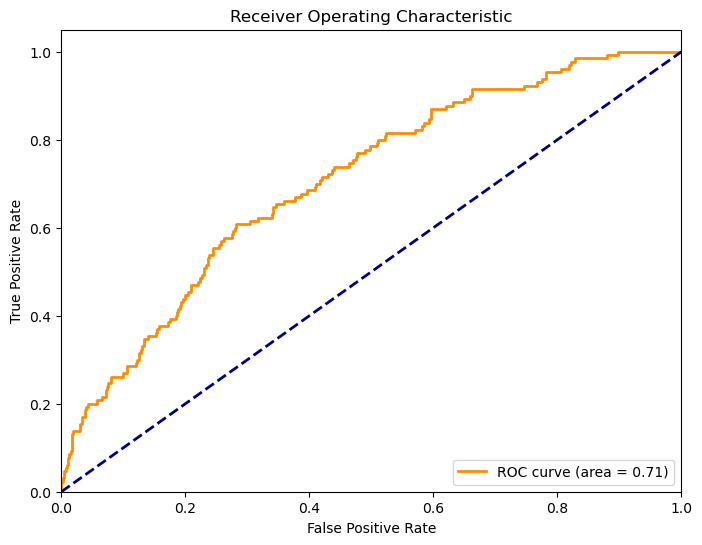

In [42]:
from sklearn.metrics import roc_curve, auc

# Assuming you have your model's predictions and true labels
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [40]:
from sklearn.metrics import accuracy_score

# Assuming y_pred and y_test are your predicted and actual labels respectively

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.79%
